### Binary Traffic Sign Classification

This is our first notebook on neural networks. We will start by building a simple neural network that will help us to classify two types of traffic signs. The signs used in this lesson are a processed subset from the famous German Traffic Sign Recognition Database (GTSRB) that can be downloaded [here]().

In [3]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

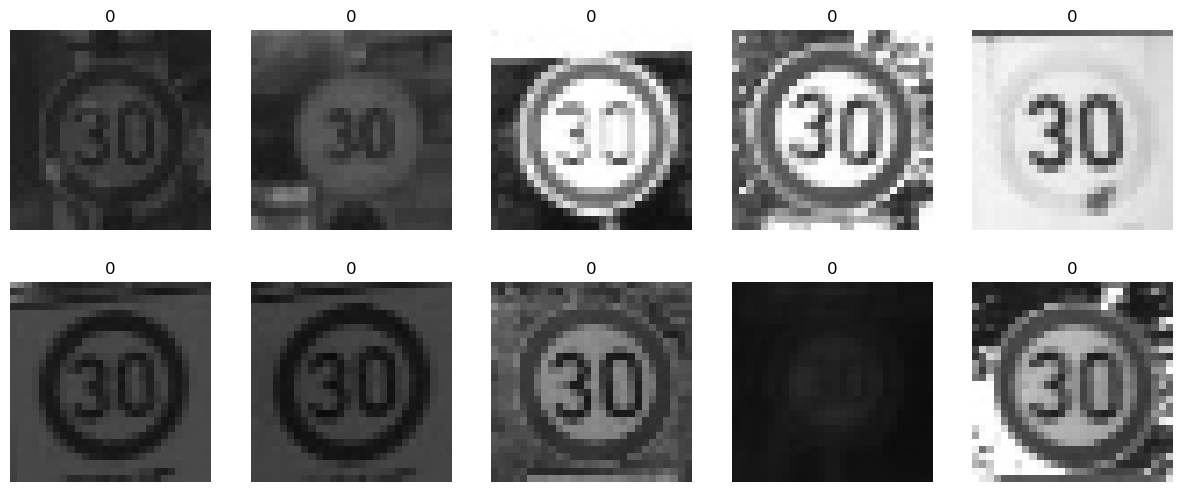

In [4]:
folder = 'subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

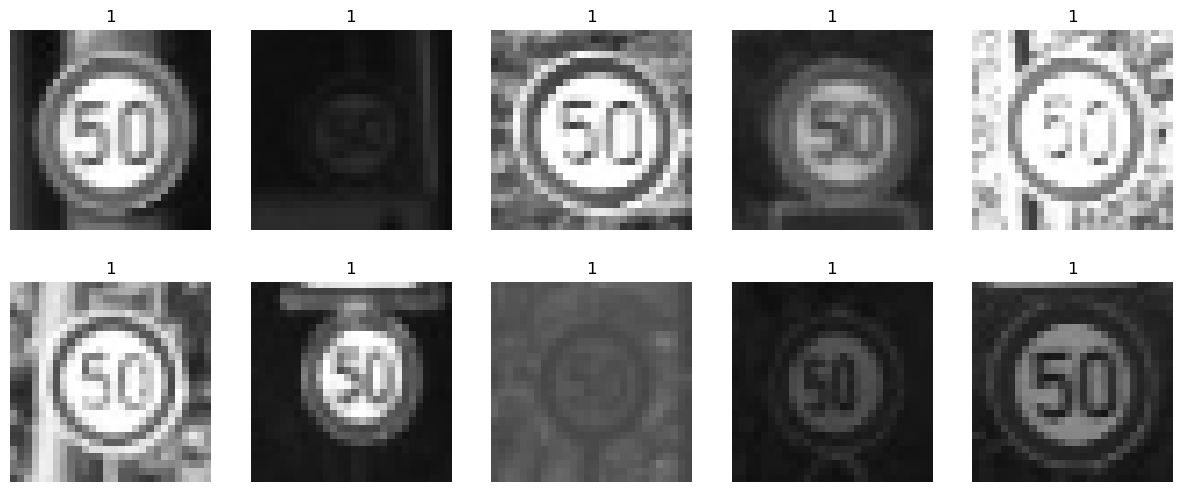

In [5]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [6]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [7]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.

In [8]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.5683879852294922


Or, you know, just let make use of our friend numpy :-)

In [9]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.021494150161743164


Before the training, let's again have a look at some raqndom samples from our dataset.

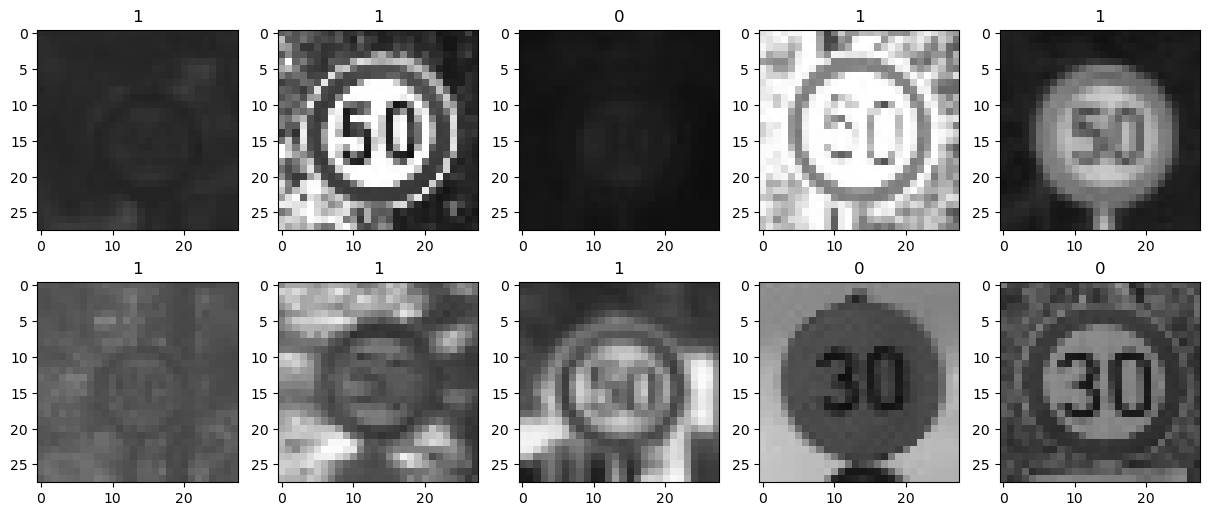

In [10]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [11]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [12]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [13]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [14]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [15]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
  1/140 [..............................] - ETA: 18s - loss: 1.1514

2024-07-02 17:35:55.191119: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


140/140 [==============================] - 0s 371us/step - loss: 0.3179
Epoch 2/10
140/140 [==============================] - 0s 302us/step - loss: 0.2259
Epoch 3/10
140/140 [==============================] - 0s 310us/step - loss: 0.1872
Epoch 4/10
140/140 [==============================] - 0s 312us/step - loss: 0.1597
Epoch 5/10
140/140 [==============================] - 0s 306us/step - loss: 0.1438
Epoch 6/10
140/140 [==============================] - 0s 317us/step - loss: 0.1318
Epoch 7/10
140/140 [==============================] - 0s 305us/step - loss: 0.1176
Epoch 8/10
140/140 [==============================] - 0s 303us/step - loss: 0.1117
Epoch 9/10
140/140 [==============================] - 0s 324us/step - loss: 0.1060
Epoch 10/10
140/140 [==============================] - 0s 332us/step - loss: 0.0995


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

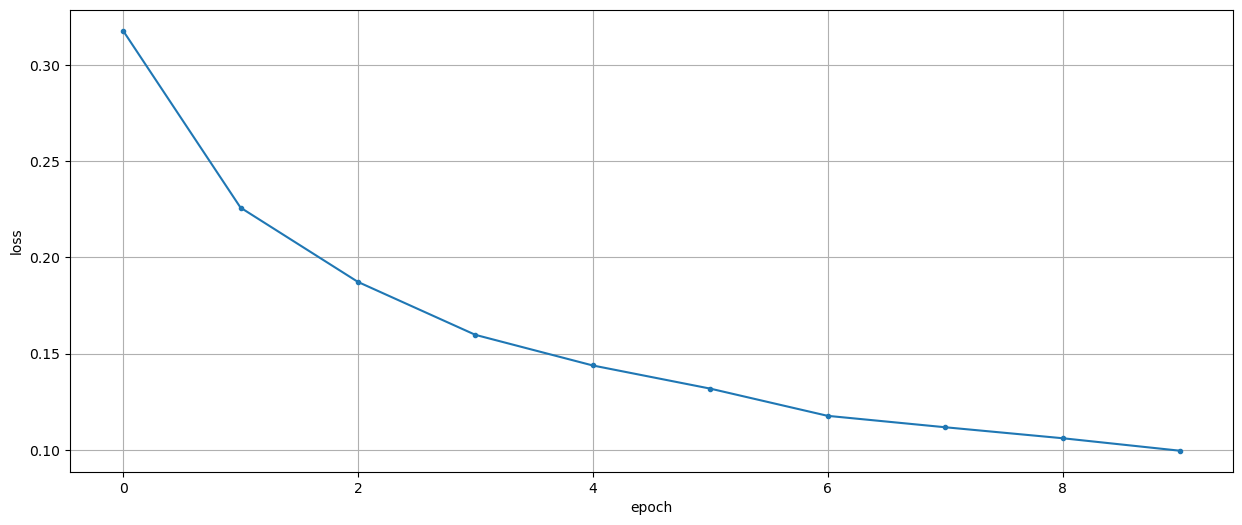

In [16]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.39754844] [0.39754844]


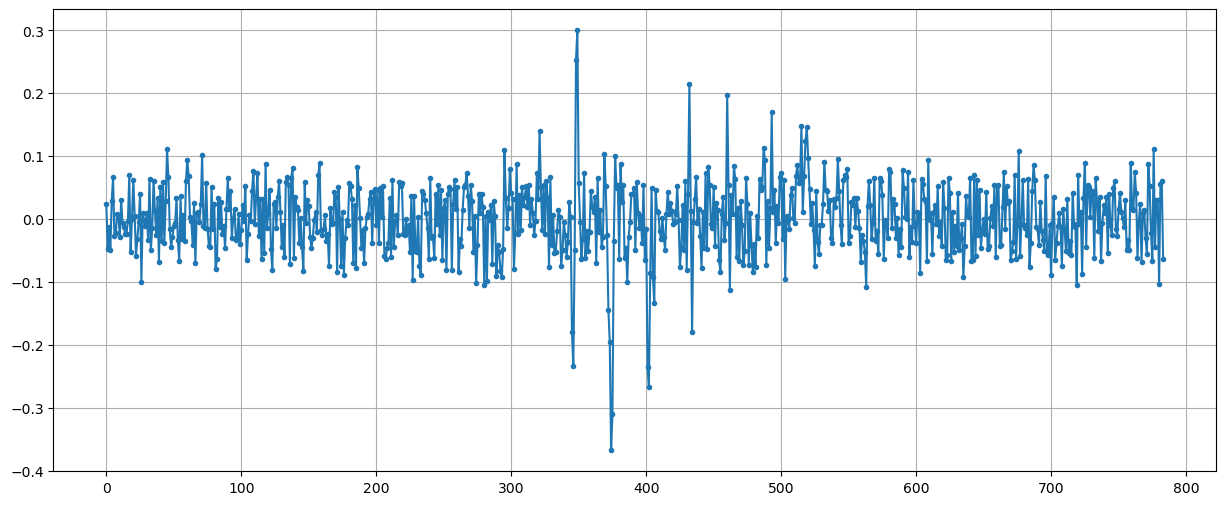

In [17]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [18]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 55ms/step
[[0.6469885]] 1


In [19]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 281us/step


In [20]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9167785234899329


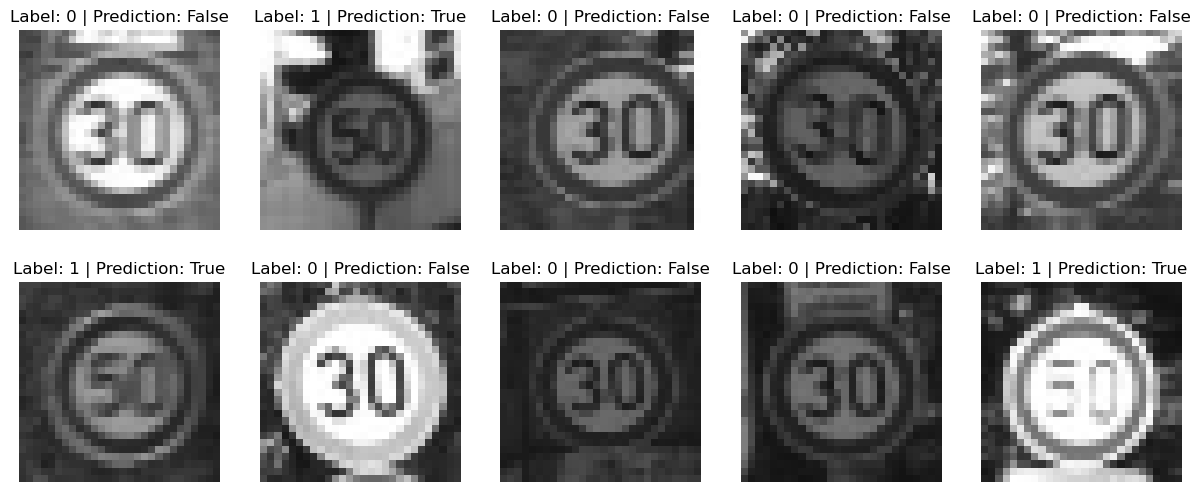

In [21]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 52,353
Trainable params: 52,353
Non-trainable

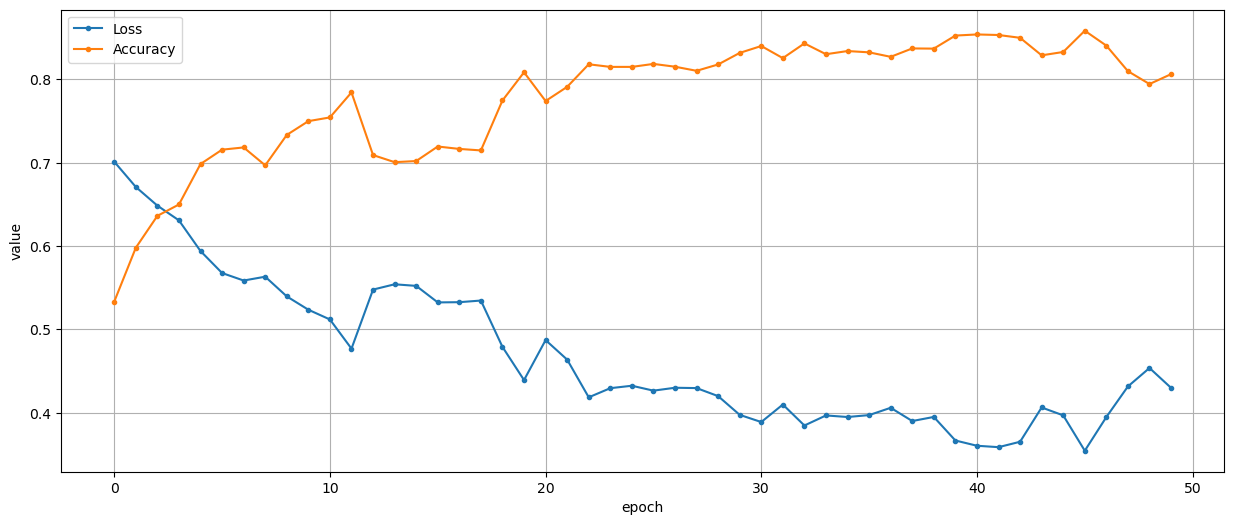

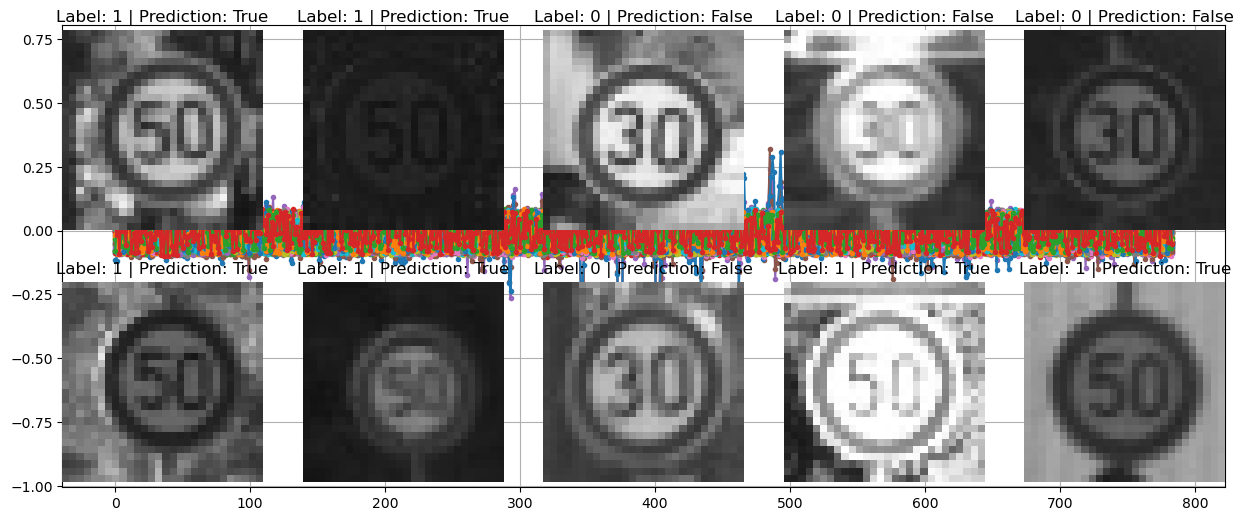

In [27]:
# Building the Neural Network
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Dropout

inputs = Input(shape=(pixels.shape[1],))

# Add more neurons and layers
x = Dense(64, activation='relu')(inputs)  # Increased number of neurons, changed activation to 'relu'
x = Dropout(0.5)(x)  # Added dropout layer
x = Dense(32, activation='relu')(x)  # Added additional layer with 'relu' activation
x = Dropout(0.5)(x)  # Added dropout layer

outputs = Dense(1, activation='sigmoid')(x)  # Output layer with 'sigmoid' activation
model = Model(inputs, outputs)

model.summary()
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(pixels, labels, epochs=50, batch_size=32)  # Increased number of epochs

# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-', label='Loss')
plt.plot(epochs, h['accuracy'], '.-', label='Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()

# Let's also have a look at the learned weights
plt.figure()
plt.plot(model.layers[1].weights[0].numpy(), '.-')
plt.grid(True)

# Performance Evaluation
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = np.sum(predictions == labels)
accuracy = correct / len(labels)

print('Accuracy', accuracy)

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)